In [2]:
# Instalar paquete anastruct
!pip install git+https://!pip install gitgithub.com/EnriqueGarMac/Estructuras_I_II.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://!pip install gitgithub.com/EnriqueGarMac/Estructuras_I_II.git to /tmp/pip-req-build-mx5mrule
  Running command git clone -q https://!pip install gitgithub.com/EnriqueGarMac/Estructuras_I_II.git /tmp/pip-req-build-mx5mrule


In [9]:

import numpy as np
from anastruct import SystemElements

ss = SystemElements()

h = 3.0 # Ancho celda
hv = 2.60 # Alto montantes

Ar = 0.01 # Area
Ey = 210e+3 # Módulo de Young

Q = -139.*3./2.

# Añadimos cordones inferiores
ss.add_truss_element(location=[[0,0], [h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[h,0], [2*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,0], [3*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,0], [4*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h,0], [5*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[5*h,0], [6*h,0]],EA=Ey*Ar)

# Añadimos cordones superiores
ss.add_truss_element(location=[[h/2.,hv], [h/2.+h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2.+h,hv], [h/2.+2*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2.+2*h,hv], [h/2.+3*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2.+3*h,hv], [h/2.+4*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2.+4*h,hv], [h/2.+5*h,hv]],EA=Ey*Ar)

# Añadimos diagonales
ss.add_truss_element(location=[[0,0], [h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h/2.0,hv], [h,0.0]],EA=Ey*Ar)
ss.add_truss_element(location=[[h,0.0], [h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h+h/2.0,hv], [2*h,0.]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,0.], [2*h+h/2,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h+h/2,hv], [3*h,0.0]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,0.0], [3.*h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[3.*h+h/2.0,hv], [4.*h,0.0]],EA=Ey*Ar)
ss.add_truss_element(location=[[4.*h,0.0], [4.*h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[4.*h+h/2.0,hv], [5*h,0.0]],EA=Ey*Ar)
ss.add_truss_element(location=[[5*h,0.0], [5*h+h/2.0,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[5*h+h/2.0,hv], [6*h,0.0]],EA=Ey*Ar)

# Añadimos rótula al nodo 1
ss.add_support_hinged(node_id=1)
# Añadimos carrito al nodo 4
ss.add_support_roll(node_id=7, direction=2)

# Añadimos carga puntual al nodo 2
ss.point_load(1, Fy=Q*h/2.0)
ss.point_load(2, Fy=Q*h)
ss.point_load(3, Fy=Q*h)
ss.point_load(4, Fy=Q*h)
ss.point_load(5, Fy=Q*h)
ss.point_load(6, Fy=Q*h)
ss.point_load(7, Fy=Q*h/2.0)




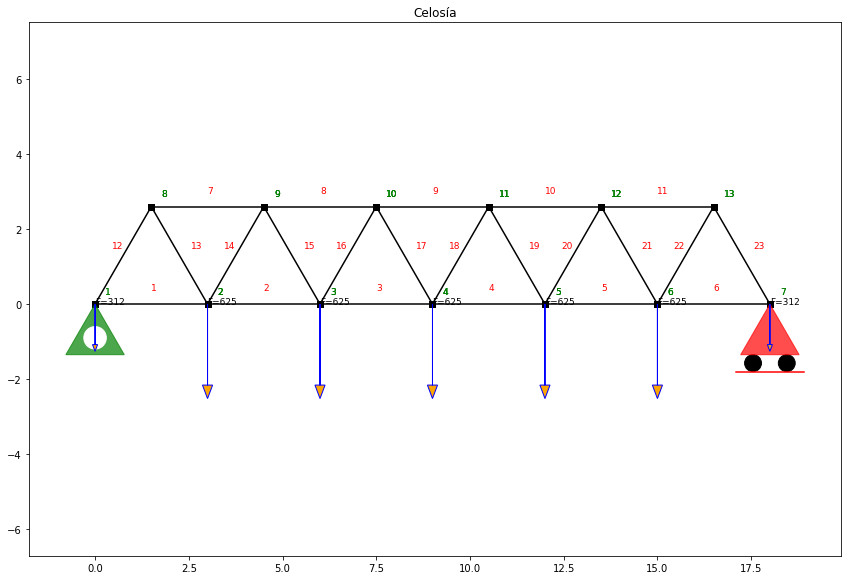

In [10]:
# Mostramos estructura generada
ss.show_structure(title='Celosía')

In [11]:
# Resolvemos la estructura
ss.solve();


 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -0.0   0.0
2  ->  1.2888049923280418   -26.033863957514285
3  ->  4.639697972380919   -44.033514712824896
4  ->  9.02163494629621   -50.42995369472879
5  ->  13.403571920211506   -44.03351471282491
6  ->  16.75446490026438   -26.033863957514296
7  ->  18.043269892592413   0.0
8  ->  18.043269892592402   -13.388702663257465
9  ->  15.465659907936352   -36.00029311487042
10  ->  11.341483932486666   -48.49575453107793
11  ->  6.701785960105769   -48.49575453107795
12  ->  2.5776099846560796   -36.000293114870445
13  ->  2.2279900926296246e-14   -13.388702663257472


Reacciones
***************************
*Nodo:  1
Reacción Fy:  1876.5
*Nodo:  7
Reacción Fy:  1876.5


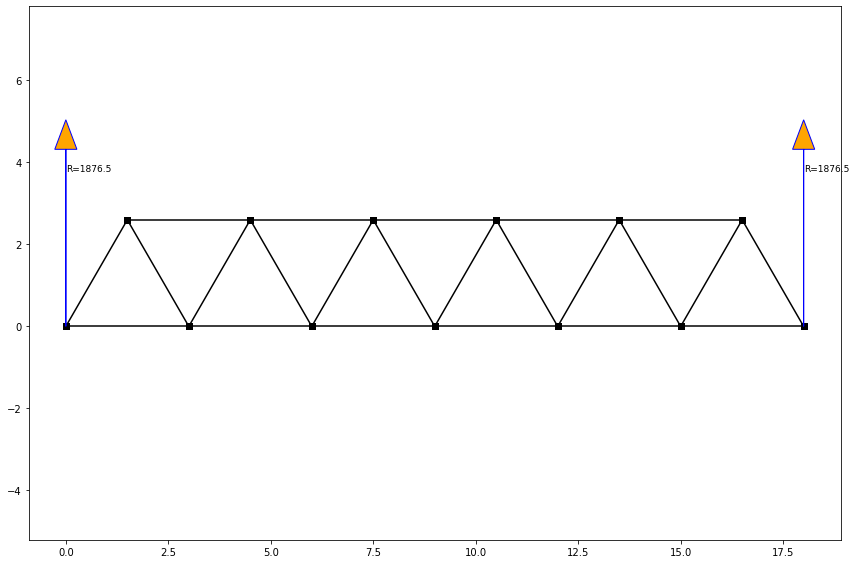

-------------------------------------------


In [12]:
# Mostramos las reacciones
ss.show_reaction_force()

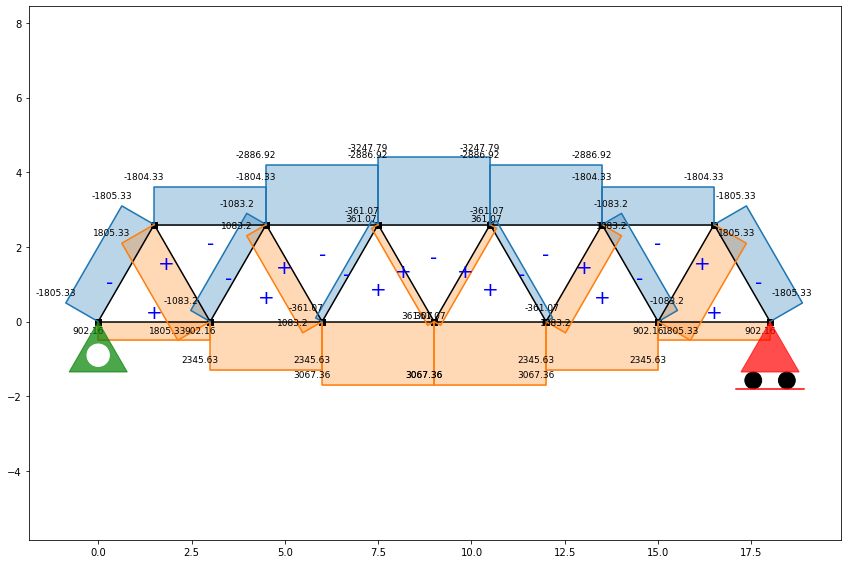

In [13]:
# Mostramos axiles
ss.show_axial_force()



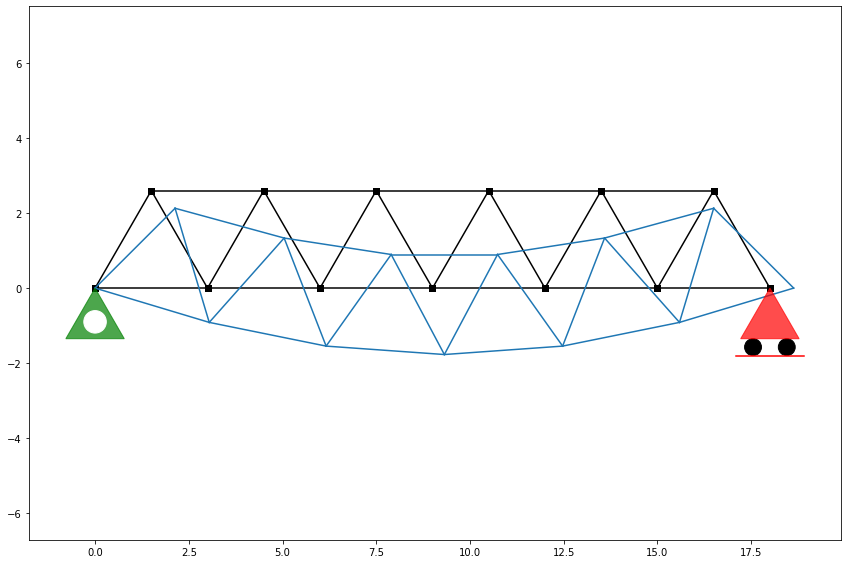

In [14]:
# Mostramos deformada
ss.show_displacement()